

---



In [6]:
class Segment: 
    def __init__(self, start, end, segment_id):
        self.start = start
        self.end = end
        self.segment_id = segment_id

class Event: 
    def __init__(self, coordinates, event_type, segment_id):
        self.coordinates = coordinates
        self.event_type = event_type
        self.segment_id = segment_id

class EventQueue: 
    def __init__(self):
        self.events = []

    def put(self, event):
        self.events.append(event)
        self.events.sort(key=lambda x: x[0])

    def get(self):
        return self.events.pop(0)

    def empty(self):
        return len(self.events) == 0

def intersect_segment(p, T, L, Q): 
    current_id = p.segment_id
    next_id = find_next_segment(T, current_id)

    while next_id is not None:
        if (current_id, next_id) not in L:
            L.add((current_id, next_id))
            intersection_event = Event(p.coordinates, "intersection", current_id)
            Q.put((-p.coordinates[0], intersection_event))
        current_id = next_id
        next_id = find_next_segment(T, current_id)

def handle_event(p, T, L, Q): 
    if p.event_type == "start":
        insert_segment(T, Segment(p.coordinates, p.coordinates, p.segment_id))
        intersect_segment(p, T, L, Q)

    elif p.event_type == "end":
        r, s = find_neighbors(T, p.segment_id)
        remove_segment(T, p.segment_id)
        intersect_segment(Event(p.coordinates, "intersection", r), T, L, Q)
        intersect_segment(Event(p.coordinates, "intersection", s), T, L, Q)

    elif p.event_type == "intersection":
        swap_order(T, p.segment_id)
        q, t = find_neighbors(T, p.segment_id)
        intersect_segment(Event(p.coordinates, "intersection", q), T, L, Q)
        intersect_segment(Event(p.coordinates, "intersection", t), T, L, Q)
        print(f"Intersección en {p.coordinates} entre {p.segment_id} y {q}")

def find_intersections(S): 
    Q = EventQueue()
    T = []
    L = set()

    for segment_id, (start, end) in enumerate(S):
        start_event = Event(start, "start", segment_id)
        end_event = Event(end, "end", segment_id)
        Q.put((-start[0], start_event))
        Q.put((-end[0], end_event))

    while not Q.empty():
        _, event = Q.get()
        handle_event(event, T, L, Q)

def find_neighbors(T, segment_id):
    index = find_segment_index(T, segment_id)
    if index is not None:
        prev_id = T[index - 1].segment_id if index - 1 >= 0 else None
        next_id = T[index + 1].segment_id if index + 1 < len(T) else None
        return prev_id, next_id
    return None, None

def swap_order(T, segment_id):
    index = find_segment_index(T, segment_id)
    if index is not None:
        T[index], T[index + 1] = T[index + 1], T[index]

def insert_segment(T, new_segment):
    T.append(new_segment)
    T.sort(key=lambda s: s.start[1])

def remove_segment(T, segment_id):
    index = find_segment_index(T, segment_id)
    if index is not None:
        del T[index]

def find_next_segment(T, segment_id):
    index = find_segment_index(T, segment_id)
    if index is not None and index + 1 < len(T):
        return T[index + 1].segment_id
    return None

def find_segment_index(T, segment_id):
    for i, segment in enumerate(T):
        if segment.segment_id == segment_id:
            return i
    return None



In [7]:
segmentos = [((1, 1), (4, 4)), ((2, 0), (5, 3)), ((3, 2), (6, 0))]

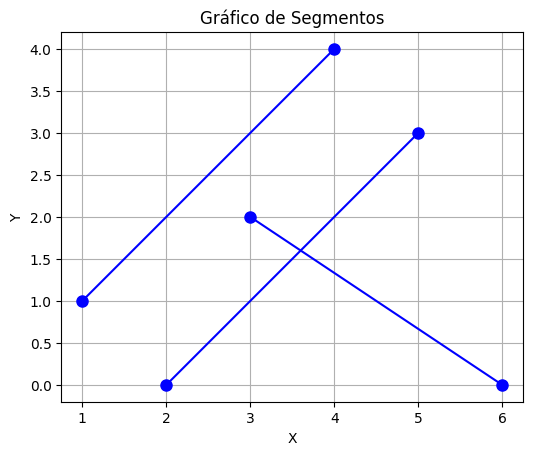

In [8]:
import matplotlib.pyplot as plt

def plot_segments(segments):
    fig, ax = plt.subplots()

    for segment in segments:
        x_values = [segment[0][0], segment[1][0]]
        y_values = [segment[0][1], segment[1][1]]

        ax.plot(x_values, y_values, marker='o', markersize=8, color='b')

    ax.set_aspect('equal', adjustable='box')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gráfico de Segmentos')
    plt.grid(True)
    plt.show()
    
# Graficar segmentos
plot_segments(segmentos)

